# Interpretable Machine Learning
## Exercise Sheet 2: Interpretable Models

### This exercise sheet covers lecture 2 on interpretable models
Sophie Langbein (langbein@leibniz-bips.de)<br>
Pegah Golchian (golchian@leibniz-bips.de)
<hr style="border:1.5px solid gray"> </hr>

# Linear Regression
The linear model is one of the first and best-studied models for regression
problems. However, it makes some (strong) assumptions about the given data. 
In the following exercise, you will learn how to fit and interpret a linear 
model and investigate its limitations. 

Let's consider a linear regression model 
for three features $p=3$ of the form
$$
\hat{f}(x) = \beta_0 + x_1 \beta_1 + x_2 \beta_2 + x_3\beta_3 = X \beta
$$
and the data is given in the csv-file `sheet_2_lin_data.csv`.

**a)** Load the data as a `pandas` data frame and visualize in a 2D plot how each 
feature ($X_1, X_2, X_3$) affects the output $Y$. Preprocess the loaded data frame
with `pandas.melt` and use the function `seaborn.scatterplot` with specified 
grouping argument (`hue`) for the visualization.

**Solution:**

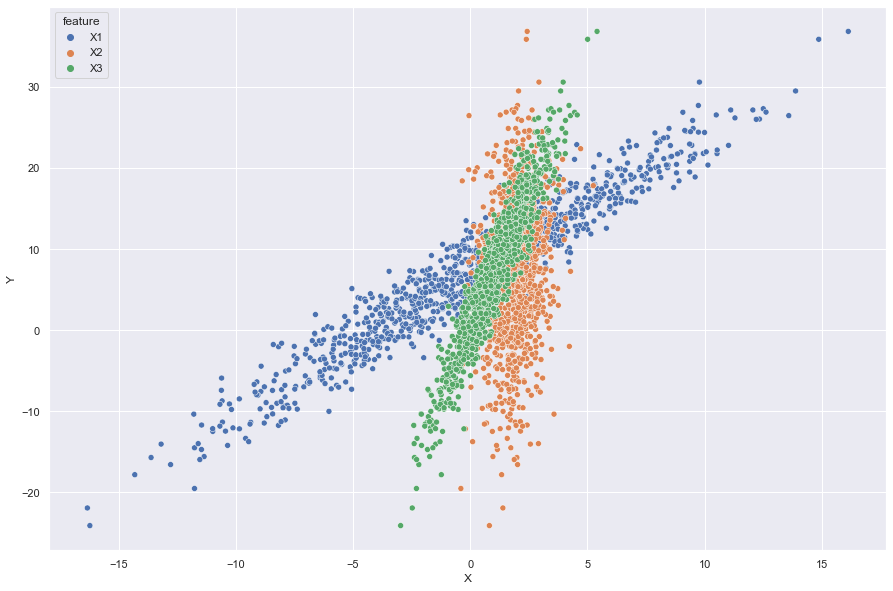

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme() # Because seaborn theme looks awesome
import pandas as pd

# Load the data from csv-file as a pandas data frame
linear_data = pd.read_csv("sheet_2_lin_data.csv")
# Preprocess the data frame so that we have only the columns "Y", "X" and "feature"
dat = pd.melt(linear_data, 
              id_vars = ['Y'], 
              value_vars = ["X1", "X2", "X3"],
              var_name = "feature",
              value_name = "X")
# Plot the data
plt.figure(figsize=(15, 10))
fig = sb.scatterplot(data = dat, x = "X", y = "Y", hue = "feature")

**b)** Determine the _design matrix_ $X$ of the given data as a `numpy` array (don't 
forget the column of ones for the intercept $\beta_0$). Using this matrix $X$, 
estimate the regression coefficients $\beta$ of the linear model by the method of least 
squares and calculate the corresponding standard error of the estimates. Do this from scratch without using any preprogrammed functions for $\beta$ or the standard errors.

**Hint:** The estimated linear regression coefficients are given by 
$\hat{\beta} = (X^T X)^{-1} X^T Y$ and the standard error
is given by the square root of the diagonal entries of $(X^TX)^{-1} \hat{\sigma}^2$ with 
$\hat{\sigma}^2 = \frac{1}{n - p} \sum_{i=1}^n (y_i- \hat{y}_i)^2$.

**Solution:**

In [3]:
import numpy as np

# Determine the design matrix X
X = linear_data.copy()
X.insert(1, "X0", 1)

# Design matrix X and outcome Y as a numpy array
X = X.loc[:,"X0":"X3"].to_numpy()
Y = linear_data["Y"].to_numpy()

# beta_hat = (X * X^T)^-1 * X^T * Y (see hint)
X_XT_inv = np.linalg.inv(np.matmul(X.T, X))
beta_hat = np.matmul(X_XT_inv, np.matmul(X.T, Y))

# Calculate the standard error estimate variance (see hint)
sigma_2 = np.sum((np.matmul(X, beta_hat) - Y)**2) / (X.shape[0] - 3) # sum((hat(Y) - Y)^2)
standard_error = np.diag(sigma_2 * X_XT_inv)**0.5

# Print the result
pd.DataFrame(data = {"beta_hat": beta_hat, "SE": standard_error}, index = ["b0", "b1", "b2", "b3"])

,beta_hat,SE
b0,0.079442,0.100265
b1,1.017804,0.014197
b2,2.024202,0.039881
b3,2.920754,0.054071


**c)** Calculate the $R^2$-value. What does the $R^2$-value mean in this context?

**Solution:**

$R^2 = 1 - \frac{\text{SSE}}{\text{SST}}$ 

$R^2 = \frac{\text{ESS}}{\text{SST}}$ 

$SST = ESS + SSE$

$SST = \sum_i (y_i - \bar{y}_i)$

$SSE = \sum_i (y_i - \hat{y}_i)$

$ESS = \sum_i (\hat{y}_i - \bar{y}_i)$

In [4]:
# Calculate the squared sum of the error terms
sse = np.sum((np.matmul(X, beta_hat) - Y)**2)

# Calculate the squared sum of the data variance
sst = np.sum((Y - np.mean(Y))**2)

# Calculate and print the R²-value
"R²-value: {:.4f}".format(1 - sse / sst)

'R²-value: 0.9875'

The R²-value takes values between 0 and 1 and describes how much variance in the true outcome is explained by the model and how well the model describes the given data. Since in this case the R²-value is almost 1, it is a very good fit and if we look only at the prediction performance, the linear model is a perfect choice for the given data.

**d)** What happens to the outcome if we increase the first feature value $X_1$ by three? 

**Solution:**

In [5]:
# The outcome Y increases by
beta_hat[1] * 3

3.053412277715296

**e)** Which feature is the most important one?

Feature importance:
- Absolute t-statistic value = $\hat{\theta}_j$ scaled with standard error $SE(\theta_j)$ = reliability of estimate ($\hat{\theta}_j/SE(\theta_j)$)
- High t-values ⇒ important (significant) feature 
- p-value: probability of obtaining a more extreme test statistic assuming H0 is correct (here: $\theta_j = 0$)
- High $|t|$ ⇒ small p-value (speaks against H0)

In [6]:
# Calculate feature importance using t-statistic value
importance = np.abs(beta_hat / standard_error)
print(importance)

# Get the most important feature
most_important_feature = np.argmax(importance)

# Print the most important feature
"X" + str(most_important_feature)

[ 0.79231435 71.69387346 50.75562432 54.01712585]


'X1'

**f)** The data was sampled by the data generating process 
$$f(x) = x_1 + 2 x_2 + 3 x_3 + \varepsilon.$$ 
Does the most important feature from part d) make sense regarding the data 
generating process? Explain your answer!

**Solution:**

At a first look: No! If you look at the data generating process, $x_3$ would have to be the most important feature because it gets the highest weighting with $3$ i.e. it has the biggest influence on output $y$. Apart from the intercept, $x_1$ would have to be the least important feature because it has the smallest weight. Thus, it seems that not all the requirements for a linear model are satisfied.

For example, the input features $x_1$ and $x_3$ are highly correlated. This is something we refer to as  multicollinearity problem, which causes a biased estimate of the feature effects $\beta$, because the model can't distinguish the individual effect of each feature on the target variable.

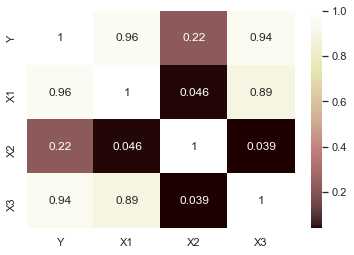

In [7]:
# Plot the correlation
sb.heatmap(linear_data.corr(), annot = True, cmap = "pink")
plt.show()

<hr style="border:1.5px solid gray"> </hr>

# Logistic Regression

## Introduction of odds ratio

The iml course is taught at three universities: Bremen, Hannover and Munich. 

The following table shows the absolute joint and marginal distribution of the exam outcomes and the university location for students who took the course in 2021 (totally real data of course).

|          | Bremen   | Hannover | Munich   || Σ     |
|----------|----------|----------|----------||-------|
| Pass     |    14    |    25    |    42    ||   81  |
| Fail     |    21    |    15    |     7    ||   43  |
|----------|----------|----------|----------||-------|
| Σ        |    35    |    40    |    49    ||  124 ||

**a)** Calculate and interpret the odds of passing the IML exam vs. failing the IML 2021.

**Solution:**

The odds are defined by the probability of an event divided by
the probability of its counter event, i.e. $\text{odds} = \frac{\mathbb{P}(outcome = pass)}{\mathbb{P}(outcome = fail)}$. 

$$
\text{odds}_{pass} = \frac{\mathbb{P}(outcome = pass)}{\mathbb{P}(outcome = fail)} = \frac{81}{43} \tilde{=}\ 1.88 .
$$

Interpretation: In the occurrence of passing is only 1.88 times as likely as failing.

**b)** Calculate and interpret the odds of passing the IML exam vs. failing the IML exam in Bremen in 2021.

**Solution:**

The odds are defined by the probability of an event divided by
the probability of its counter event, i.e. $\text{odds} = \frac{\mathbb{P}(outcome = pass)}{\mathbb{P}(outcome = fail)}$. 
In this case we are only considering students in Bremen and therefore looking at the conditional probabilities.

$$
\text{odds}_{pass} = \frac{\mathbb{P}(outcome = pass|university = Bremen)}{\mathbb{P}(outcome = fail|university = Bremen)} = \frac{14}{21} = \frac{2}{3} \hat{=}\ \text{"2-to-3"} .
$$

Interpretation: In Bremen the occurrence of passing is only 0.67 times as likely as failing.

**c)** Calculate and interpret the odds ratio of passing vs. failing of a student in Munich vs. Bremen in 2021.

**Solution:**

The odds ratio, often denoted as OR, is typically used to compare the odds of an event occurring in one group to the odds of the same event occurring in another group. It's a way to quantify the relationship or association between two categorical variables. The general definition of the odds ratio is as follows, i.e. $\text{Odds Ratio  (OR)} = \frac{\text{Odds of the event in Group A}}{\text{Odds of the event in Group B}}$.

$$
\text{OR} = \frac{\frac{\mathbb{P}(outcome = pass \,|\, university = Munich)}{\mathbb{P}(outcome = fail \,|\, university = Munich}}{\frac{\mathbb{P}(outcome = pass \,|\, university = Bremen)}{\mathbb{P}(outcome = fail \,|\, university = Bremen}} = \frac{\frac{42}{7}}{\frac{14}{21}} = \frac{6}{\frac{2}{3}} =\ 9 .
$$

Interpretation: there is a 9 times higher chance of passing the IML exam in Munich compared to the reference city Bremen.

## Logistic Regression in Python
In this exercise, a logistic model is fitted on the [wine dataset](https://archive.ics.uci.edu/dataset/109/wine) derived from three different cultivars (`first cultivar`, `second cultivar`, `third cultivar`). For this exercise we want to consider a two dimensional classification problem, which is why we are interested only in whether a wine is of the first cultivar (`first cultivar`) or not (`second cultivar` or `third cultivar`). For 
this purpose, we use the [`scikit-learn`](https://scikit-learn.org/stable/) package.

**a)** Load the wine dataset from `sklearn.datasets` and save the features with 
corresponding output in one `pandas` dataframe. Adjust the output to the 
binary classification problem described above. The outcome dataframe should contain the new binary target in a column named `target_binary` and apart from that only the four feature columns `alcohol`, `malic_acid`, `magnesium`and `color_intensity`. 

**Solution:**

In [8]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
wine_dataset = load_wine()

# Create a Pandas DataFrame with feature names as column names
wine_df = pd.DataFrame(wine_dataset.data, columns = wine_dataset.feature_names)

# Add the original target variable as a new column
wine_df['target_original'] = wine_dataset.target

# Adjust the target to binary, remember  0 = 'first cultivar', 1 = 'second cultivar' and 2 = 'third cultivar'
wine_df['target_binary'] = wine_df.target_original == 0 # convert target into boolean 
wine_df

# Filter relevant columns
selected_columns = ['alcohol', 'malic_acid', 'magnesium', 'color_intensity', 'target_binary']
filtered_wine_df = wine_df[selected_columns]
filtered_wine_df

,alcohol,malic_acid,magnesium,color_intensity,target_binary
0,14.23,1.71,127.0,5.64,True
1,13.20,1.78,100.0,4.38,True
2,13.16,2.36,101.0,5.68,True
3,14.37,1.95,113.0,7.80,True
4,13.24,2.59,118.0,4.32,True
...,...,...,...,...,...
173,13.71,5.65,95.0,7.70,False
174,13.40,3.91,102.0,7.30,False
175,13.27,4.28,120.0,10.20,False
176,13.17,2.59,120.0,9.30,False


**b)** Visualize this dataframe with `seaborn.pairplot` with grouping argument `target_binary`.
What do you think which feature incremented by one unit increases the odds for the class `first cultivar` the most? Explain your choice.

**Solution:**

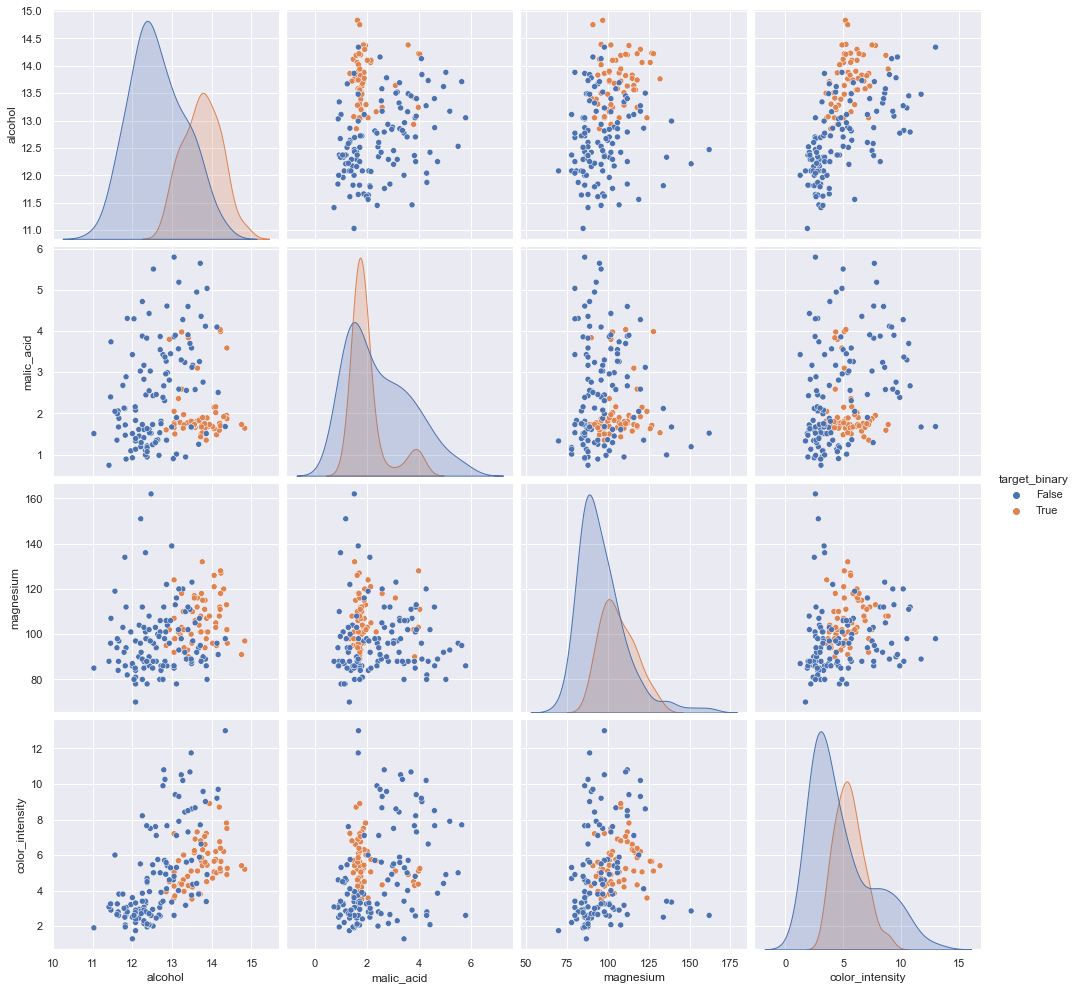

In [9]:
# Plot the dataframe
fig = sb.pairplot(data = filtered_wine_df, hue = 'target_binary', height = 3.5)

Increasing feature $1$, the alcohol content of the wine, will probably increase the chances for the wine belonging to class 'first cultivar' the most. Because:

1. Distribution of individual features: If we look at the distribution plots on the diagonal, we notice heterogeneities in the distribution shapes. In the case of the last three features, large overlaps are already visible and a shift of the blue ('not first cultivar') distribution curve by one to the right (corresponding to an increase of the input feature by 1) would not change them. But if the blue curve of input feature 1 is shifted to the right, there are much more new overlaps, i.e. the difference from before to after is much larger than for the last three features.

2. Distribution of feature pairs: We are looking for features, for which, if a datapoint is incremented by 1 in the corresponding feature value, it would move closer to the cluster of datapoints for the 'first cultivar' class. For example, if we increase the feature 'malic_acid' for some random blue datapoint, we do not necessarily move closer to the cluster of 'first cultivar' points, depending on which point is chosen. In contrast, for the alcohol feature, there is a clear separation of the 'first cultivar' and 'not first cultivar' point clouds, and increasing a random blue datapoint always leads to it it moving closer to the 'first cultivar' cloud.

**c)** Fit a regression model with the function `sklearn.linear_model.LogisticRegression` and extract the estimated model parameters $\beta$ from it. Now we want to determine 
the odds ratio of the parameters. Similar to examples b) and c) in exercise 3.1, 
a logistic model provides a probability conditional on the input data $x$, i.e. 
the odds are given by

$$
\text{odds}_\text{logreg} = \frac{\mathbb{P}(Y = 1 \mid x)}{\mathbb{P}(Y = 0 \mid x)}.
$$

The stochastic model is now modified by increasing a component of $x$. Denote with $x_{x_i \to x_i +1}$ a vector where the $i$-th component (feature) is increased by one unit. Thus, the following representation of the odds ratio for the i-th parameter results:

$$
\text{OR}_i = \frac{\frac{\mathbb{P}(Y = 1 \, \mid \, x_{x_i \to x_i +1})}{\mathbb{P}(Y = 0 \, \mid \, x_{x_i \to x_i +1})}}{\frac{\mathbb{P}(Y = 1 \, \mid \, x)}{\mathbb{P}(Y = 0 \, \mid \, x)}} = \exp(\beta_i).
$$

What are the odds ratios of your fitted logistic regression model, and which 
feature increases the odds for the class `first cultiva` the most? How does your 
choice fit with your thoughts from b)?

**Solution:**

In [10]:
from sklearn.linear_model import LogisticRegression

# Get the input and outcome of your wine dataframe and convert to numpy array
X = filtered_wine_df.iloc[:, :-1].to_numpy()
Y = filtered_wine_df.iloc[:, -1].to_numpy()

# Fit a logistic regression model on these data
model_logreg = LogisticRegression().fit(X, Y)

# Plot the result in a clear table
beta = np.append(model_logreg.intercept_, model_logreg.coef_)
pd.DataFrame(data = {"label": ["intercept", "alcohol", "malic_acid", "alcalinity_of_ash", "proline"], 
                     "beta": beta, "odds ratio": np.round(np.exp(beta), 2)})

,label,beta,odds ratio
0,intercept,-43.216131,0.00
1,alcohol,3.184073,24.14
2,malic_acid,-0.639807,0.53
3,alcalinity_of_ash,0.036293,1.04
4,proline,-0.333986,0.72


<hr style="border:1.5px solid gray"> </hr>

# Linear Regression with Interactions and Generalized Additive Models
 
Load the dataset `house_dataset2.csv`. This dataset contains the purchase prices of $10.000$ houses in Germany and includes the `Size` (in m²), `Location` ($0=$ bad, $1=$ good, $2=$ very good and $3=$ luxury), the year of construction (`Year of Construction`), the number of rooms (`Number of Rooms`), the size of the garden (in m²) (`Garden Size`) and whether the house is in an urban area or not (`urban`).

**a)** Fit a linear regression model and calculate the mean squared error (MSE) of the dataset.

**Solution:**

$MSE = \frac{1}{n} \sum_i (\hat{y}_i - y_i)^2$

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Prepare dataset by converting it to arrays
house_data = pd.read_csv("house_dataset_2.csv")
X = house_data.iloc[:, 0:-1].to_numpy()
Y = house_data.iloc[:, -1].to_numpy()

# Fit a linear regression model
linear_model = LinearRegression().fit(X,Y)

# Calculate the MSE
'MSE:  ' + str(np.round(np.mean((linear_model.predict(X) - Y)**2), 2))

'MSE:  4704026009.68'

Mean Squared Error (MSE) is a widely used metric in statistics and machine learning to assess the goodness of fit of a model, particularly in regression analysis. It quantifies the average squared difference between the predicted values (estimated by your model) and the actual observed values (ground truth). The MSE value has the square of the units of the dependent variable (or target variable). A smaller MSE indicates a better model fit, hence the MSE is most valuable when comparing different models. 

**b)** How can this dataset be examined to see whether the feature interactions between the features `Size` ~ `Garden Size`, `Size` ~ `Number of Rooms` and `Garden Size` ~ `Number of Rooms`  affect the output? A visual explanation is enough.

**Solution:**

A three-way scatterplot (also known as a 3D scatterplot) is a visualization technique that can be used to detect interactions between three variables. It allows you to visualize the relationship between three variables simultaneously. To detect interactions, you can look for patterns in the 3D scatterplot that indicate non-additive effects or relationships between the features.

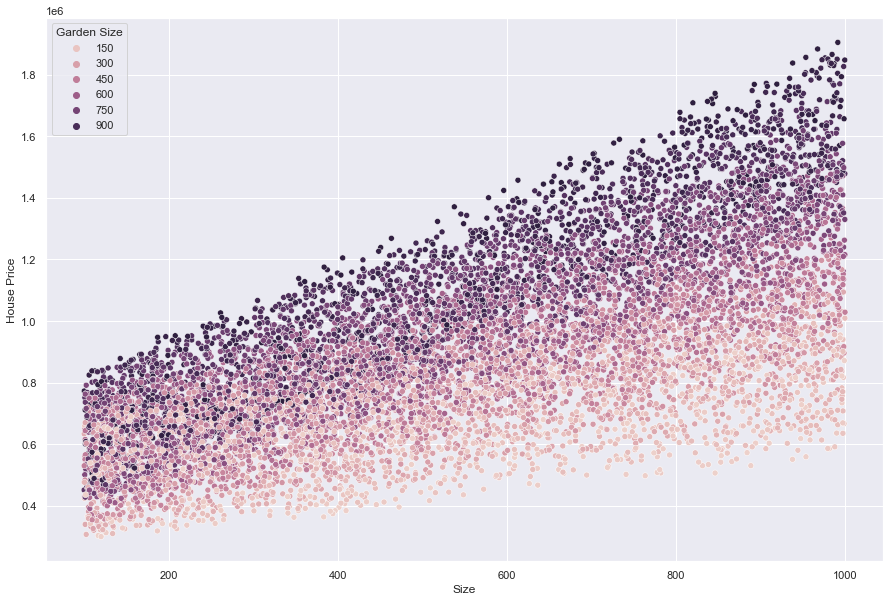

In [12]:
import seaborn as sb
sb.set_theme() # Because seaborn theme looks awesome
import matplotlib.pyplot as plt

## Visualize interactions 'Size' ~ 'Garden Size' using a 3 way scatterplot
plt.figure(figsize = (15, 10))
fig = sb.scatterplot(data = house_data, x = "Size", y = "House Price", hue = "Garden Size")

Assuming they would not interact, a change in `Size` should only provide a uniform shift with respect to the y-axis, which shows the outcome `House Price`, since the effect would be constant in the linear model. But here we observe that the slope changes when `Garden Size` is changed, so it must be an interaction of `Size` ~ `Garden Size`.

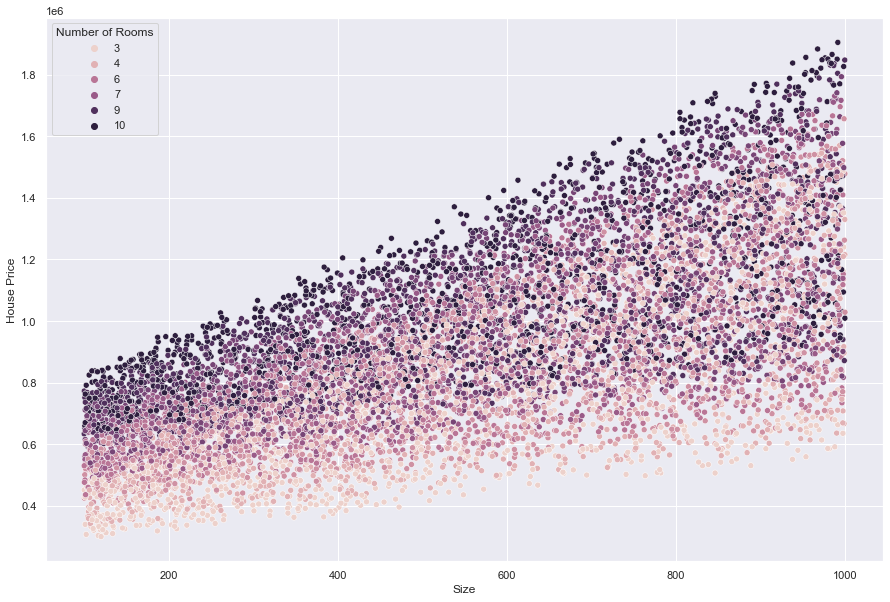

In [13]:
## Visualize interactions 'size' ~ 'year' using a 3 way scatterplot
plt.figure(figsize = (15, 10))
fig = sb.scatterplot(data = house_data, x = "Size", y = "House Price", hue = "Number of Rooms")

Assuming they would not interact, a change in `Size` should only provide a uniform shift with respect to the y-axis, which shows the outcome `House Price`, since the effect would be constant in the linear model. But here we observe that the slope changes when `Number of Rooms` is changed, so it must be an interaction of `Size` ~ `Number of Rooms`.

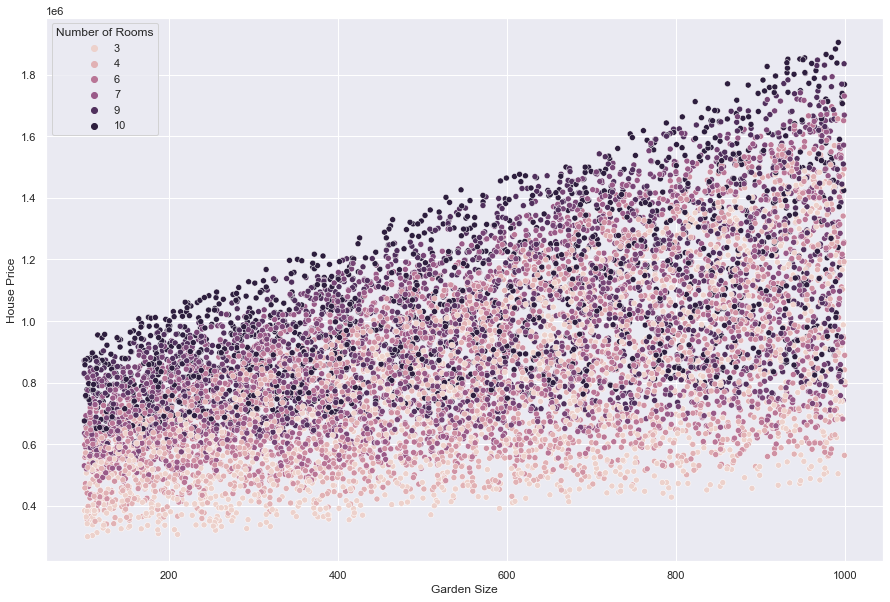

In [14]:
## Visualize interactions 'size' ~ 'year' using a 3 way scatterplot
plt.figure(figsize = (15, 10))
fig = sb.scatterplot(data = house_data, x = "Garden Size", y = "House Price", hue = "Number of Rooms")

All plots look the same (except for a shift in height), so no interaction (at least not a strong one) is apparent. 

**c)** Fit a linear regression model on these data by manually adding the relevant interactions. Then calculate the MSE again.

**Solution:**

In [15]:
# Add interactions manually to the dataset
house_data_interact = house_data
house_data_interact['size_rooms'] = house_data_interact['Size'] * house_data_interact['Number of Rooms']
house_data_interact['size_garden'] = house_data_interact['Size'] * house_data_interact['Garden Size']

# Convert to array
X_interact = house_data_interact.iloc[:, [0,1,2,3,4,5,7,8]].to_numpy()
Y_interact = house_data_interact.iloc[:, [6]].to_numpy()

# Fit a linear regression model with interactions
linear_model = LinearRegression().fit(X_interact,Y_interact)

# Calculate the MSE
'MSE:  ' + str(np.round(np.mean((linear_model.predict(X_interact) - Y_interact)**2), 2))

'MSE:  873773.39'

A smaller MSE indicates a better model fit. We see that the model with interaction has a much smaller MSE than the model without interactions, indicating a better fit. 

**d)** Fit a generalized additive model on these data using `LinearGAM` from the `pygam` package. Accomodate for non-linearity in the features by using spline term `s` and ad the relevant interactions using tensor product terms `te`. Then calculate the MSE again. What do you notice about the MSE? Why is this happening?

**Solution:**

A Generalized Additive Model (GAM) is a statistical model that extends linear regression by allowing for flexible, non-linear relationships between predictors and the response variable. It does this by modeling the predictors as a sum of smooth functions, providing a more versatile way to capture complex patterns and interactions in the data. In contrast to linear regression, which assumes a linear relationship between predictors and the response, GAMs can capture non-linear and interactive effects, making them suitable for more complex relationships in the data.

In [16]:
from pygam import LinearGAM, s, te, l

# Fit a GAM model
gam_model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + te(0,4) + te(0,3)).fit(X, Y)

# Calculate the MSE
'MSE:  ' + str(np.round(np.mean((gam_model.predict(X) - Y)**2), 2))

'MSE:  0.0'

A zero MSE typically means that the model's predictions match the actual target values perfectly. In practice this is rarely ever the case and if it is, it is usually a sign of severe overfitting. Here it is simply because the data was artificially simulated without any noise in a way, which can be perfectly captured by the GAM. 

<hr style="border:1.5px solid gray"> </hr>

# Decision Trees

For this exercise, we will use the `wine` dataset from before. Now we will look at the original dataset from `sklearn.datasets`. 

**a)** Load the data an get yourself familiar with the explanatory variables. Hint: have a look at `feature_names` and `target_names`.

**Solution:**

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
wine_dataset = load_wine()

In [3]:
wine_dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

**b)** We now want to build a decision tree model that predicts whether the a wine is of kind `'first cultivar', 'second cultivar'` or `'third cultivar'`. For this purpose, do we have to fit a regression or classification decision tree? 

**Solution:**

This is a multi-class classification problem as any wine belongs to one out of three possible categories.

**c)** Fit a decision tree model to the wine dataset set using `sklearn`.`

**Solution:**

In [5]:
from sklearn import tree

# Instantiate tree classifier
model = tree.DecisionTreeClassifier(random_state = 2)

# Fit model
model = model.fit(wine_dataset.data, wine_dataset.target)

**d)** Display the fitted tree graphically using the `plot_tree()` method. Explain how to read the output and interpret the results.

**Solution:**

[Text(0.5657894736842105, 0.9166666666666666, 'proline <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]\nclass = class_1'),
 Text(0.34210526315789475, 0.75, 'od280/od315_of_diluted_wines <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]\nclass = class_1'),
 Text(0.21052631578947367, 0.5833333333333334, 'hue <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]\nclass = class_2'),
 Text(0.10526315789473684, 0.4166666666666667, 'flavanoids <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = class_2'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = class_2'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(0.3157894736842105, 0.4166666666666667, 'alcohol <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]\nclass = class_1'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = class_1'),
 Text(0.3684210526315789, 0.25, 'gin

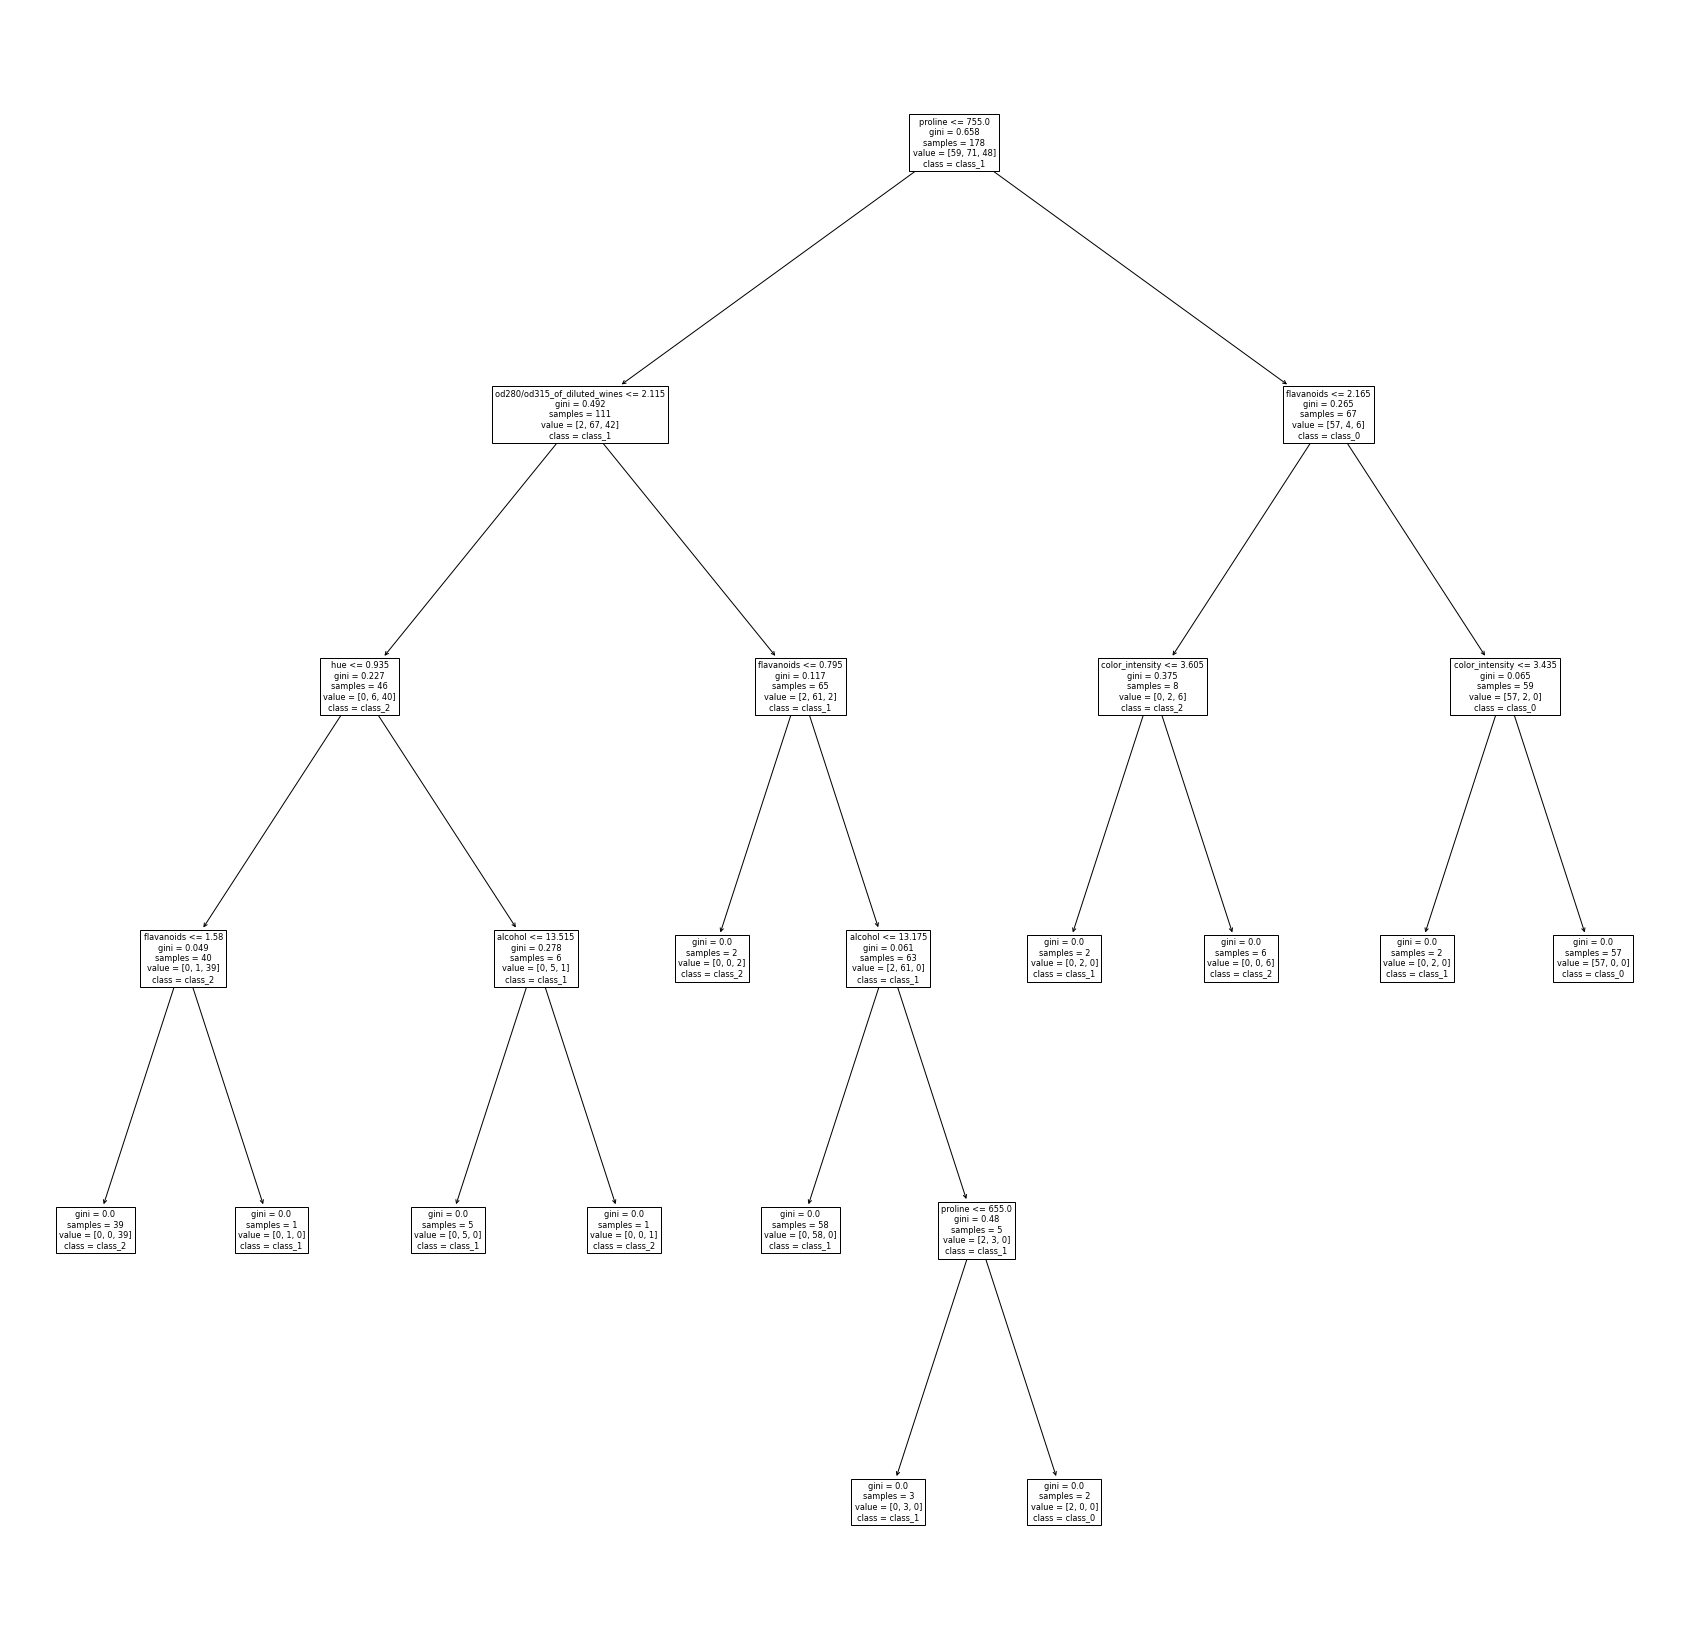

In [6]:
import matplotlib.pyplot as plt

# Adjust figure size 
plt.figure(figsize=(30,30)) 

# Plot tree
tree.plot_tree(model, feature_names=wine_dataset.feature_names, class_names=wine_dataset.target_names)

Reading the output from top to bottom gives information on splitting nodes, i.e. which variable was used for splitting and at which level, the impurity or information gain associated with a split, the number of samples in the nodes as well as the class associated with it; Example: `Proline` is chosen as root node to classify `class 1` if `proline <= 755`. This is then further qualified by the subsequent node`od280/... <= 2.115` If `proline > 755` , the decision tree continues with other subsequent nodes to split, in this case `flavanoids <= 2.115`, indicating `class 0`. 